In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('velib-emplacement-des-stations.csv', delimiter=';')

In [3]:
df = df.rename(columns={"Identifiant station": "id_station", "Nom de la station": 'name', 'Coordonnées géographiques': 'coords'})
df_clean = df.drop('Capacité de la station', axis=1)
df_clean.set_index('id_station', inplace=True)
df_clean.head()

,name,coords
id_station,,
17044,Porte de Saint-Ouen - Bessières,"48.89792240854517, 2.32851451022192"
20143,Ramponeau - Belleville,"48.871031137596, 2.379056852114"
16138,Saint-Cloud - Hippodrome,"48.85772148887421, 2.2549109905958176"
17008,Porte Pouchet-Bessières,"48.8978765, 2.3230632"
10107,Gare du Nord - Hôpital Lariboisière,"48.881949, 2.352339"


In [4]:
df_clean.isna().sum() # Checking if na values

name      0
coords    0
dtype: int64

In [5]:
df_clean[['lat', 'long']] = df_clean['coords'].str.split(', ', expand=True) # Splitting coordinates to separates columns
df_clean['lat'] = pd.to_numeric(df_clean['lat']) # casting to numerical values
df_clean['long'] = pd.to_numeric(df_clean['long']) # casting to numerical values
df_clean.head()

,name,coords,lat,long
id_station,,,,
17044,Porte de Saint-Ouen - Bessières,"48.89792240854517, 2.32851451022192",48.897922,2.328515
20143,Ramponeau - Belleville,"48.871031137596, 2.379056852114",48.871031,2.379057
16138,Saint-Cloud - Hippodrome,"48.85772148887421, 2.2549109905958176",48.857721,2.254911
17008,Porte Pouchet-Bessières,"48.8978765, 2.3230632",48.897877,2.323063
10107,Gare du Nord - Hôpital Lariboisière,"48.881949, 2.352339",48.881949,2.352339


In [6]:
X=df_clean.loc[:, ['lat', 'long']] # Data which is meant to be clustered
X.head()

,lat,long
id_station,,
17044,48.897922,2.328515
20143,48.871031,2.379057
16138,48.857721,2.254911
17008,48.897877,2.323063
10107,48.881949,2.352339


In [7]:
# 30 clusters because of number of Paris district + nb of cities around
kmeans = KMeans(n_clusters = 74, init ='k-means++')
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
X.head(10)

,lat,long,cluster_label
id_station,,,
17044,48.897922,2.328515,9
20143,48.871031,2.379057,71
16138,48.857721,2.254911,49
17008,48.897877,2.323063,9
10107,48.881949,2.352339,73
11002,48.855079,2.373369,60
16039,48.840975,2.264390,49
11027,48.862148,2.377235,16
18028,48.894019,2.331987,9


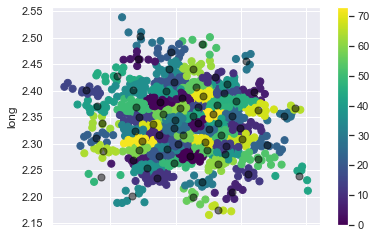

In [8]:
X.plot.scatter(x = 'lat', y = 'long', c=X['cluster_label'], s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

In [9]:
X['cluster_label']

id_station
17044     9
20143    71
16138    49
17008     9
10107    73
         ..
51007    43
8031     70
20035    71
22209    22
22305    23
Name: cluster_label, Length: 1453, dtype: int32

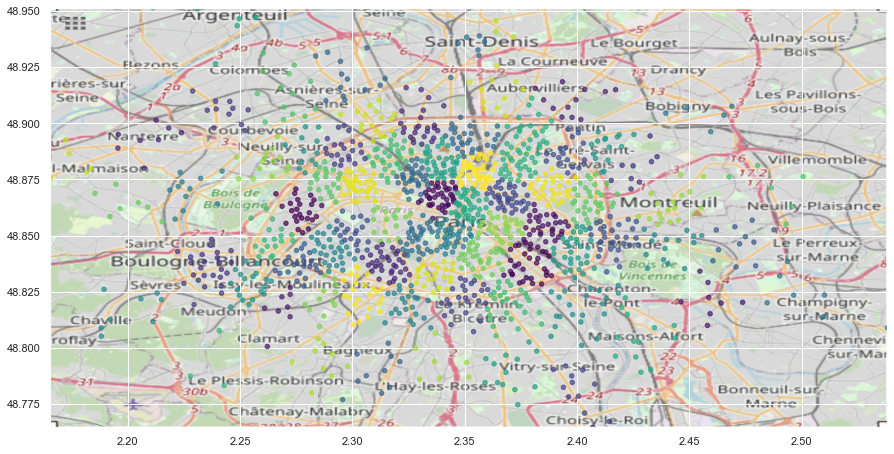

In [65]:
BBox = ((X.long.min(), X.long.max(), X.lat.min(), X.lat.max()))
        
paris_map = plt.imread('./map.png')

fig, ax = plt.subplots(figsize = (15, 55))
ax.scatter(X.long, X.lat, zorder=1, alpha= 0.7, c=X['cluster_label'], s=20, cmap='viridis')
ax.imshow(paris_map, zorder=0, extent = BBox, aspect= 'equal')